In [25]:
# plot_enrichment_introgressed_circadian_in_gtex_tissue.ipynb
"""""""""""""""""""""""""""""""""
# Author: Keila Velazquez-Arcelay
#
# Description: Plot the probability of success of circadian eQTLs in each GTEx tissue,
#              in a background of all introgressed GTEx eQTLs.
#
"""""""""""""""""""""""""""""""""


# INPUT DATA
INPUT_FILE = '../data/enrichment_circadian_introgressed_by_tissue.tsv'


import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_style("white")
sns.set_context("paper")


def plot_barplot(x, y, df, loc, export, output):
    df.sort_values(by=y, inplace=True)
    plt.figure(figsize = (5,10))
    #sns.color_palette("Set2")
    sns.set(font_scale=1.1)
    sns.set_style("whitegrid")
    g = sns.barplot(x=y, orient = 'h',
                y=x, data=df, 
                color='blue', 
                hue='Bonferroni', 
                dodge=False, 
                edgecolor="black",
                palette = 'PuBu_r')
    plt.xticks(rotation=90)
    # The xticks are on a log2 scale but will be displayed on a linear scale
    locs, labels = plt.xticks()
    labels = [round(2**float(item),2) for item in locs]
    plt.xticks(locs, labels)
    plt.xlabel('Odds ratio (log2 scale)')
    plt.legend(title='P-value', loc=loc) # , labels=['Not significant', 'Significant', 'Bonferroni corrected']
    
    if export == 'plot':
        plt.savefig(output, dpi=500, bbox_inches='tight')
    
    plt.show()


df = pd.read_csv(INPUT_FILE, sep='\t')



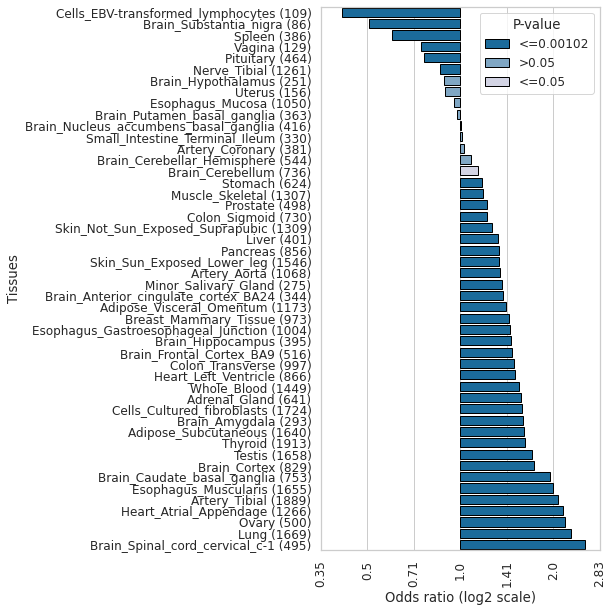

In [24]:
# PLOT FISHER'S LOG2 ODDS RATIO FOR EACH TISSUE
plot_barplot('Tissues', 'log2(odds ratio)', df, 'upper right', 'no_plot', '../plots/Figure5b.pdf')


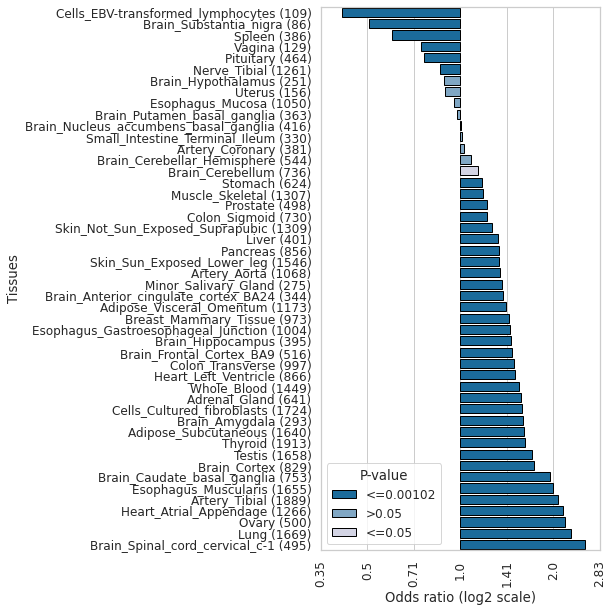

In [10]:
# PLOT FISHER'S LOG2 ODDS RATIO FOR EACH TISSUE
plot_barplot('Tissues', 'log2(odds ratio)', df, 'lower left', 'no_plot', 'plots/fishers_introgressed_in_tissue.pdf')


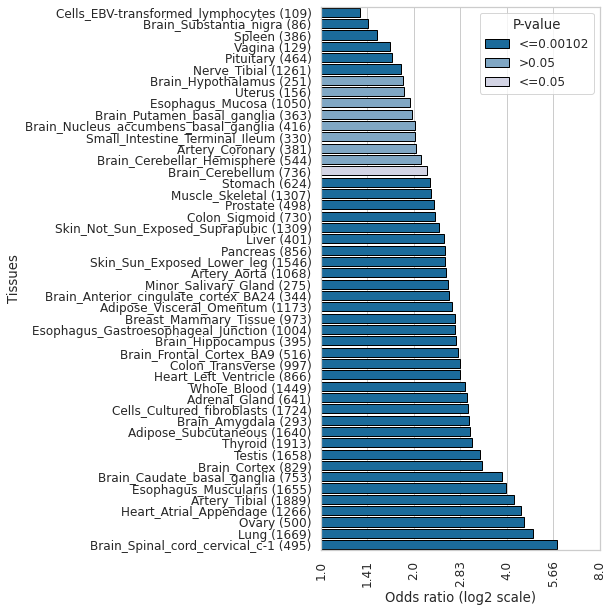

In [12]:
# PLOT OR VALUES
plot_barplot('Tissues', 'OR', df, 'upper right', 'no_plot', 'plots/fishers_introgressed_in_tissue.pdf')
